# TODOs:
- refactor clustering plotting to own class

# Preface

In [186]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
from collections import Counter
dt_customer = pd.read_csv("../data/customer.tsv", delimiter="\t", index_col=0)

---
# Task 2.1
Use of the k-Means clustering algorithm to generate customer groups based on the number of items each customer has bought and returned. What values of k produce meaningful clusters? Try to  find suitable labels for the created cluster

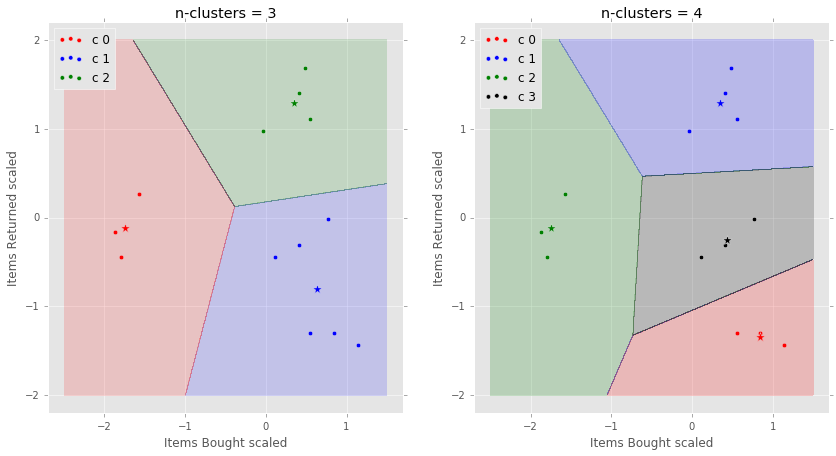

In [85]:
# Slicing the data
dt_customer_bought_returned = dt_customer[["ItemsBought", "ItemsReturned"]]


# Normalizing the values
sc = StandardScaler()
dt_customer_bought_returned_scaled = pd.DataFrame(sc.fit_transform(dt_customer_bought_returned),
                                                  columns=dt_customer_bought_returned.columns,
                                                  index=dt_customer_bought_returned.index)


# Initating & fitting the k-means learners
km_3 = KMeans(n_clusters=3) 
km_3.fit(dt_customer_bought_returned_scaled)
km_4 = KMeans(n_clusters=4) 
km_4.fit(dt_customer_bought_returned_scaled)


# Plotting the clusters with centroid
## setup the plot
colors = ("red", "blue", "green", "black")
cmap = ListedColormap(colors)
fig, axes = plt.subplots(1,2)
fig.set_figwidth(14)
fig.set_figheight(7)
axes[0].set_title("n-clusters = 3")
axes[1].set_title("n-clusters = 4")
for ax in axes:
    ax.set_xlabel("Items Bought scaled")
    ax.set_ylabel("Items Returned scaled")

## left plot with n-clusters = 3
for idx, l in enumerate(np.unique(km_3.labels_)):
    cluster = dt_customer_bought_returned_scaled.ix[km_3.labels_==l,:]
    ### points in cluster
    axes[0].scatter(cluster.iloc[:,0], 
                    cluster.iloc[:,1], 
                    c=colors[idx],
                    label="c {}".format(l))
    ### centroids
    axes[0].scatter(km_3.cluster_centers_[idx][0], 
                    km_3.cluster_centers_[idx][1], 
                    c=colors[idx], 
                    marker="*",
                    s=100)
    ### legend
    axes[0].legend(loc="upper left")
    ### decision region
    x, y = np.linspace(-2.5, 1.5, 1000), np.linspace(-2, 2, 1000)   
    xx, yy = np.meshgrid(x, y)
    z = km_3.predict(np.array([xx.ravel(), yy.ravel()]).T)
    axes[0].contourf(xx, yy, z.reshape(xx.shape), alpha=0.05, cmap=ListedColormap(colors[:3]))
    
## right plot with n-clusters = 4
for idx, l in enumerate(np.unique(km_4.labels_)):
    cluster = dt_customer_bought_returned_scaled.ix[km_4.labels_==l,:]
    ### points in cluster
    axes[1].scatter(cluster.iloc[:,0], 
                    cluster.iloc[:,1], 
                    c=colors[idx],
                    label="c {}".format(l))
    ### centroids
    axes[1].scatter(km_4.cluster_centers_[idx][0], 
                    km_4.cluster_centers_[idx][1], 
                    c=colors[idx], 
                    marker="*",
                    s=100)
    ### legend
    axes[1].legend(loc="upper left")
    ### decision region
    x, y = np.linspace(-2.5, 1.5, 1000), np.linspace(-2, 2, 1000)   
    xx, yy = np.meshgrid(x, y)
    z = km_4.predict(np.array([xx.ravel(), yy.ravel()]).T)
    axes[1].contourf(xx, yy, z.reshape(xx.shape), alpha=0.05, cmap=ListedColormap(colors[:4]))
    

# appending cluster labels to dataframe and add a "return ratio"
dt_customer_labeled = dt_customer\
.assign(km3Label=km_3.labels_)\
.assign(km4Label=km_4.labels_)\
.assign(ReturnRatio=dt_customer["ItemsReturned"]/dt_customer["ItemsBought"])

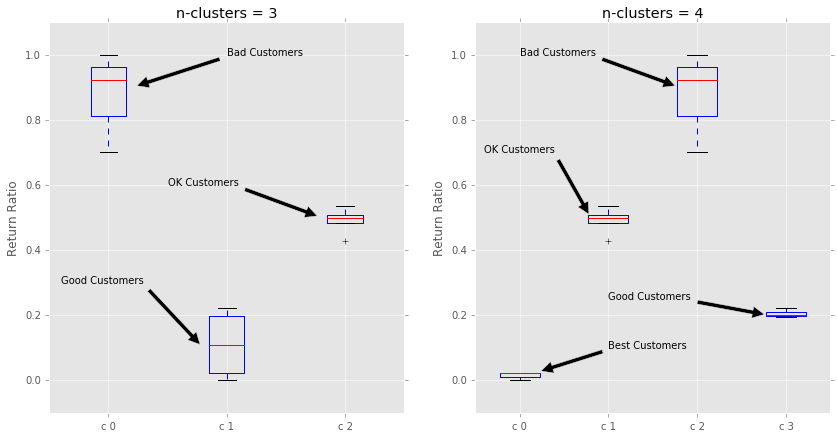

In [154]:
# Evaluate ReturnRatios per Cluster via Boxplot
fig, axes = plt.subplots(1,2)
fig.set_figwidth(14)
fig.set_figheight(7)
axes[0].set_title("n-clusters = 3")
axes[1].set_title("n-clusters = 4")

# left plot
## boxplot
data_k3 = [
    dt_customer_labeled.ix[dt_customer_labeled["km3Label"] == 0, "ReturnRatio"],
    dt_customer_labeled.ix[dt_customer_labeled["km3Label"] == 1, "ReturnRatio"],
    dt_customer_labeled.ix[dt_customer_labeled["km3Label"] == 2, "ReturnRatio"]
]
axes[0].boxplot(data_k3)
axes[0].set_ylim(-.1, 1.1)
axes[0].set_xticklabels(["c 0", "c 1", "c 2"])
axes[0].set_ylabel("Return Ratio")
## annotations
axes[0].annotate("Bad Customers", xy=(1.2,0.9), xytext=(2,1),arrowprops=dict(facecolor='black', shrink=0.05))
axes[0].annotate("OK Customers", xy=(2.8,0.5), xytext=(1.5,0.6),arrowprops=dict(facecolor='black', shrink=0.05))
axes[0].annotate("Good Customers", xy=(1.8,0.1), xytext=(0.6, 0.3),arrowprops=dict(facecolor='black', shrink=0.05))



# right plot
## boxplots
data_k4 = [
    dt_customer_labeled.ix[dt_customer_labeled["km4Label"] == 0, "ReturnRatio"],
    dt_customer_labeled.ix[dt_customer_labeled["km4Label"] == 1, "ReturnRatio"],
    dt_customer_labeled.ix[dt_customer_labeled["km4Label"] == 2, "ReturnRatio"],
    dt_customer_labeled.ix[dt_customer_labeled["km4Label"] == 3, "ReturnRatio"]
]
axes[1].boxplot(data_k4)
axes[1].set_ylim(-.1, 1.1)
axes[1].set_xticklabels(["c 0", "c 1", "c 2", "c 3"])
axes[1].set_ylabel("Return Ratio")
## annotations
axes[1].annotate("Bad Customers", xy=(2.8, 0.9), xytext=(1,1),arrowprops=dict(facecolor='black', shrink=0.05))
axes[1].annotate("OK Customers", xy=(1.8, 0.5), xytext=(0.6, 0.7),arrowprops=dict(facecolor='black', shrink=0.05))
axes[1].annotate("Good Customers", xy=(3.8, 0.2), xytext=(2,0.25),arrowprops=dict(facecolor='black', shrink=0.05))
axes[1].annotate("Best Customers", xy=(1.2, 0.025), xytext=(2,0.1),arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

---
# Task 2.2
Identify the products that are bought and returned by our likely bad customers.

In [161]:
dt_customer_labeled.loc[
    dt_customer_labeled["km3Label"] == 0,
    "Product"].unique()

array([2435])

The product `2435` is the only product bought & returned by the bad customer segment.

---
# Task 2.3
Find the most common ZipCodes of our best customers.

In [170]:
Counter(dt_customer_labeled.loc[
    dt_customer_labeled["km3Label"] == 1,
    "ZipCode"
].values)

Counter({1: 3, 2: 3})

The ZipCodes `1` as well as `2` occur with the same frequency.

---
# Task 2.4
Exchange the k-Means operator by the Agglomerative Clustering operator and inspect the resulting dendogram. What does this  gure tell you about your customer groups?

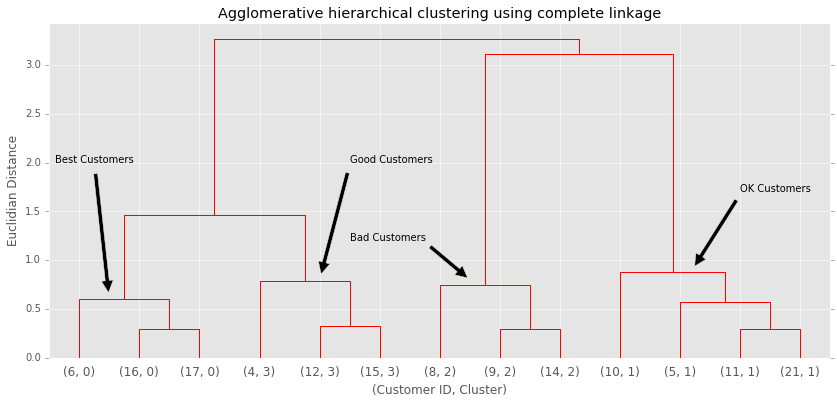

In [259]:
# Compute clusters by using complete linkage
row_clusters = linkage(dt_customer_bought_returned_scaled, method="complete")

# Draw dendogram
## cosmetics
labels = list(zip(dt_customer_labeled.index.values, dt_customer_labeled["km4Label"].values))
plt.rcParams["figure.figsize"] = [14, 6]
plt.ylabel("Euclidian Distance")
plt.xlabel("(Customer ID, Cluster)")
plt.title("Agglomerative hierarchical clustering using complete linkage")
## basic dendrogram
set_link_color_palette(["red"])
row_dendr = dendrogram(row_clusters, labels=labels, color_threshold=np.inf)
## annotations
plt.annotate("Best Customers", xy=(10,.6), xytext=(1,2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Good Customers", xy=(45,.8), xytext=(50,2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Bad Customers", xy=(70,.8), xytext=(50,1.2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("OK Customers", xy=(107,.9), xytext=(115,1.7), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

---
# Task 2.5
Create four clusters from the hierarchical clustering and think about possible labels for the created clusters. Please use MixedMeasures with MixedEuclideanDistance as proximity measure.

See Task 2.4

---
# Task 2.6
Make use of the k-Means clustering algorithm to group the students based on their mark and the number of attended courses. Does one attribute dom- inate the result of the clustering? What can you do about this? Assign suit- able labels to your clusters.

---
# Task 2.7
Experiment with di erent parameter settings for calculating the cluster sim- ilarity. The resulting dendogram should help you to interpret your results by inspecting the distance between two clusters before they get joined.

---
# Task 2.8
Cluster the data using the k-Means operator. Do the calculated clusters rep- resent the original three areas?

# Task 2.9
Think about which values for epsilon make sense for this dataset. Apply them (set min points to 3) and try to reproduce the original clusters of the dataset.